In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats
from matplotlib import pyplot as plt

from pltconfig import *

In [2]:
# Load endpoint growth data of mutants from four days of growth
# Endpoint data (4 days) from matched 3mL cultures in 10% CO2 and ambient. 
matched_od_4day_df = pd.read_csv('data/mutant_phenotypes/090619_CCMB1_mutants_endpointODs_tubes.csv')
mask = matched_od_4day_df.use == True
matched_od_4day_df = matched_od_4day_df[mask].drop('use', axis=1)

mo4d = matched_od_4day_df
amb_4day_df = mo4d[mo4d.condition == 'ambient']
highCO2_4day_df = mo4d[mo4d.condition == '10% CO2']

# Calculate mean values for the 3mL scale experiment. 
mean_4day_10pct = highCO2_4day_df.groupby('short_name').mean()
mean_amb_4day_df = amb_4day_df.groupby('short_name').mean()

std_4day_10pct = highCO2_4day_df.groupby('short_name').std()
std_4day_amb = amb_4day_df.groupby('short_name').std()

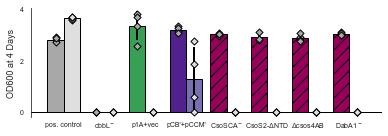

In [3]:
# Combined figure of four day and 12 day growth experiments. 
fig = plt.figure(figsize=(5.5,2))
sns.set_style('white')

# Set the order for this panel
order = ['pos', 
         'full CCM K194M', 
         'p1A/AGFP',
         'full CCM post',
         'csosCA C173S', 'csos2 dNTD', 'dcsos4AB', 'DabA1-', ]
ticknames = ['pos. control', 
             "cbbL$^{-}$", 
             'p1A+vec',
             "pCB'+pCCM'",
             "CsoSCA$^-$", 
             "CsoS2-$\Delta$NTD", 
             "$\Delta$csos4AB",
             "DabA1$^-$"] 

# manually set bar colors. could have done this more elegantly...
bars_10pct = [
    greys[3], greys[3], # controls - grey
    # Rubisco alone/no carboxysome - green
    greens[-3], 
    # Full CCM gene set
    purples[-1],
    # Mutants with most of the CCM are red/purple
    reddish_purple, reddish_purple, reddish_purple, reddish_purple]

bars_amb = [
    greys[1], greys[1],
    greens[-5],
    purples[-3],
    reddish_purple, reddish_purple, reddish_purple, reddish_purple]


xs = np.arange(len(order))
width = 0.4
offset = width/2
bars_10pct = plt.bar(xs-offset, mean_4day_10pct.loc[order].OD.values, color=bars_10pct, width=width, edgecolor='k')
plt.bar(xs+offset, mean_amb_4day_df.loc[order].OD.values, color=bars_amb, width=width, edgecolor='k')

# Hatches for the mutants
for bar in bars_10pct[-4:]:
    bar.set_hatch('//')

for i, name in enumerate(order):    
    highCO2_vals = highCO2_4day_df[highCO2_4day_df.short_name == name].OD.values
    amb_values = amb_4day_df[amb_4day_df.short_name == name].OD.values

    plt.scatter(np.ones(highCO2_vals.size)*i-offset, highCO2_4day_df[highCO2_4day_df.short_name == name].OD.values,
                marker='D', s=25, color=greys[3], edgecolors='k', zorder=10)
    plt.scatter(np.ones(amb_values.size)*i+offset, amb_4day_df[amb_4day_df.short_name == name].OD.values,
                marker='D', s=25, color=greys[1], edgecolors='k', zorder=10)

plt.errorbar(xs-0.2, mean_4day_10pct.loc[order].OD.values, yerr=std_4day_10pct.loc[order].OD.values, color='k', ls='', elinewidth=2)
plt.errorbar(xs+0.2, mean_amb_4day_df.loc[order].OD.values, yerr=std_4day_amb.loc[order].OD.values, color='k', ls='', elinewidth=2)
plt.axhline(0, lw=1, c='k')

plt.xticks(np.arange(len(ticknames)), ticknames, fontsize=7, ha='center', va='center')
plt.yticks(np.arange(0, 4.1, 2.0), fontsize=7)
plt.xlabel('')
plt.ylabel('OD600 at 4 Days', fontsize=9)
plt.ylim(-0.2, 4.05)
plt.xlim(-0.8, 7.8)
sns.despine(bottom=True)

plt.tight_layout()
plt.savefig('fig4/fig4.png', dpi=300)
plt.show()